<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.


Here is a reference to my "follow along"
https://colab.research.google.com/drive/1o7GfvvyeAvYZEcFQIogKSr3M26EBlmEO

#Replicating Lesson Code

for completeness


In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-10-02 05:00:01--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   886KB/s    in 25s     

2019-10-02 05:00:31 (878 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

head: cannot open 'LoanStats_2018Q4.csv' for reading: No such file or directory


In [0]:
!tail LoanStats_2018Q4.csv

In [0]:
#Loading LendingClub Data
import pandas as pd 
#I'm limiting these a fair amount because this is repeat code
pd.options.display.max_rows = 10
pd.options.display.max_columns =10

df = pd.read_csv('LoanStats_2018Q4.csv',skiprows = 1,skipfooter=2,engine='python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,...,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,...,NaN,NaN,NaN,NaN,NaN


In [0]:
# ?pd.read_csv (you can get help this way, but docs are usually easier to parse)
df.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
                                               ...  
orig_projected_additional_accrued_interest    128345
url                                           128412
member_id                                     128412
desc                                          128412
id                                            128412
Length: 144, dtype: int64

In [0]:
# Drop columns that are made completely of NaN values
df = df.drop(['url','member_id','desc','id'],axis=1) # remember axis 1 = columns and axis 0 (default)=rows

In [0]:
df.head() #success

In [0]:
#Working with strings
df['int_rate'][:10]

0     14.47%
1     16.14%
2     11.31%
3     12.98%
4     12.98%
5      7.56%
6     17.97%
7     14.47%
8     11.80%
9     17.97%
Name: int_rate, dtype: object

In [0]:
df.dtypes[:10] # note that int_rate is of type object

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length          object
dtype: object

In [0]:
int_rate = ' 15.02%'
int_rate

' 15.02%'

In [0]:
int_rate.strip()

'15.02%'

In [0]:
int_rate.strip().strip('%')

'15.02'

In [0]:
type(int_rate.strip().strip('%'))

str

In [0]:
# cast from a string to a float
float(int_rate.strip().strip('%'))

15.02

In [0]:
type(float(int_rate.strip().strip('%')))

float

In [0]:
#convert int_rate
def int_rate_to_float(mystring):
  return float(mystring.strip().strip('%'))

int_rate_to_float(int_rate)

15.02

In [0]:
#apply the function to the int_rate column
df['int_rate'].apply(int_rate_to_float)[:10]

0    14.47
1    16.14
2    11.31
3    12.98
4    12.98
5     7.56
6    17.97
7    14.47
8    11.80
9    17.97
Name: int_rate, dtype: float64

In [0]:
df['int_rate'] = df['int_rate'].apply(int_rate_to_float)
df.head() #int_rate is now numbers 

AttributeError: ignored

In [0]:
#dot notation column referencing
df.int_rate[:10]

0    14.47
1    16.14
2    11.31
3    12.98
4    12.98
5     7.56
6    17.97
7    14.47
8    11.80
9    17.97
Name: int_rate, dtype: float64

In [0]:
#bracket notation column referencing
df['int_rate'][:10]

0    14.47
1    16.14
2    11.31
3    12.98
4    12.98
5     7.56
6    17.97
7    14.47
8    11.80
9    17.97
Name: int_rate, dtype: float64

In [0]:
df.dtypes[:10]

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate           float64
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length          object
dtype: object

In [0]:
#clean emp_title
df['emp_title'].value_counts(dropna=False,ascending=False)[:20]

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
                    ...  
Nurse                 326
Engineer              325
Sales Manager         304
manager               301
Supervisor            270
Name: emp_title, Length: 20, dtype: int64

In [0]:
#How many unique job titles are there:
len(df['emp_title'].value_counts())

43892

In [0]:
#this reset index seems to turn the values into the first column, and the count as the value
df['emp_title'].value_counts().reset_index().head()

,index,emp_title
0,Teacher,2090
1,Manager,1773
2,Registered Nurse,952
3,Driver,924
4,RN,726


In [0]:
df['emp_title'].value_counts().reset_index().shape

(43892, 2)

In [0]:
#How often is the employment title Null
df['emp_title'].isnull().sum()

20947

In [0]:
#clean the title and handle the missing values
import numpy as np
type(np.NaN)

float

In [0]:
#Write a function to clean up titles and check if works
example = ['owner','Supervisor','Project Maneger',np.NaN]
 
def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return "Unknown"

[clean_title(item) for item in example]

['Owner', 'Supervisor', 'Project Maneger', 'Unknown']

In [0]:
df['emp_title'] = df["emp_title"].apply(clean_title)
df.emp_title.head(10)

0                                  Bus Driver
1                          Production Manager
2                         Compliance Director
3                   Program Support Assistant
4            Sr. Vice President -Risk Manager
5                                     Teacher
6                        Help Tech Supervisor
7    Assistant Athletic Director Of Marketing
8                      Transportation Manager
9                                  Pharmacist
Name: emp_title, dtype: object

In [0]:
df['emp_title'].value_counts(dropna=False, ascending = False)[:20]

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
                    ...  
Sales Manager         500
Police Officer        440
Nurse                 425
Technician            420
Engineer              412
Name: emp_title, Length: 20, dtype: int64

In [0]:
len(df['emp_title'].value_counts())

34902

In [0]:
#Create emp_title_manager

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains("Manager")
df.head()
# ^ that is going to contain a lot of nans:
df['emp_title_manager'].value_counts()
#actually no they are true false... it makes sense that .contains() returns a bool value

False    110530
True      17882
Name: emp_title_manager, dtype: int64

In [0]:
#Dataframe filtering example (get a subset of the dataframe)
 condition = (df['emp_title_manager'] == True)

 managers = df[df['emp_title_manager']==True]

print(managers.shape)
managers.head()

(17882, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
1,25000,25000,25000.0,60 months,16.14,...,NaN,NaN,NaN,NaN,True
4,35000,35000,35000.0,60 months,12.98,...,NaN,NaN,NaN,NaN,True
8,12000,12000,12000.0,36 months,11.80,...,NaN,NaN,NaN,NaN,True
16,12000,12000,12000.0,36 months,16.14,...,NaN,NaN,NaN,NaN,True
18,20400,20400,20400.0,60 months,10.33,...,NaN,NaN,NaN,NaN,True


In [0]:
(df['emp_title_manager'] == False) & (df['home_ownership']=="OWN")
# this should give true if both are true and false if they are both not true

0          True
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [0]:
plebians=df[(df['emp_title_manager'] == False) & (df['home_ownership'] == "MORTGAGE")]
print(plebians.shape)
plebians.head()

(53930, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
2,26500,26500,26500.0,60 months,11.31,...,NaN,NaN,NaN,NaN,False
3,10400,10400,10400.0,36 months,12.98,...,NaN,NaN,NaN,NaN,False
5,20000,20000,20000.0,36 months,7.56,...,NaN,NaN,NaN,NaN,False
6,13000,13000,13000.0,36 months,17.97,...,NaN,NaN,NaN,NaN,False
11,7000,7000,6975.0,36 months,10.72,...,NaN,NaN,NaN,NaN,False


In [0]:
managers["int_rate"].mean()

12.760582149647117

In [0]:
plebians['int_rate'].mean()

12.576722603373335

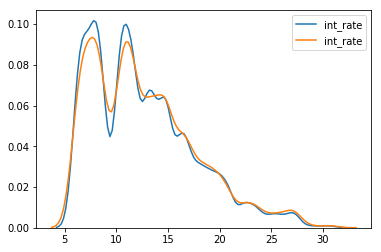

In [0]:
# We can make some visualizations based on the two subsetted data frames 
#(we can better comare two subsets instead of trying to see a trend across the whole set)

import seaborn as sns
sns.kdeplot(plebians['int_rate'])
sns.kdeplot(managers['int_rate']);

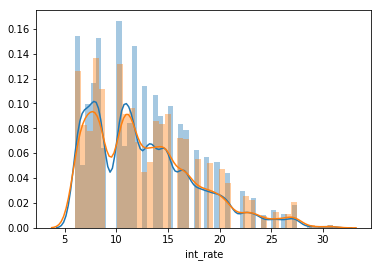

In [0]:
sns.distplot(plebians['int_rate'])
sns.distplot(managers['int_rate']);

In [0]:
#working with dates:
list(df.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',


In [0]:
#the creators of this dataset suffixed date column names with _d and we can find those like so:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df.dtypes[:15]

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
                        ...   
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
Length: 15, dtype: object

In [0]:
df['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'],infer_datetime_format=True)
df.issue_d.head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [0]:
df.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
                            ...      
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
Length: 15, dtype: object

In [0]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,settlement_term,emp_title_manager,int_rate_float,issue_year,issue_month
0,20000,20000,20000.0,36 months,14.47,...,NaN,False,14.47,2018,12
1,25000,25000,25000.0,60 months,16.14,...,NaN,True,16.14,2018,12
2,26500,26500,26500.0,60 months,11.31,...,NaN,False,11.31,2018,12
3,10400,10400,10400.0,36 months,12.98,...,NaN,False,12.98,2018,12
4,35000,35000,35000.0,60 months,12.98,...,NaN,True,12.98,2018,12


In [0]:
df['earliest_cr_line'].head()

0    Jun-1979
1    Sep-2003
2    Dec-2006
3    Jul-2013
4    Sep-1985
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],infer_datetime_format=True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df.days_from_earliest_credit_to_issue.head()

0    14428
1     5570
2     4383
3     1979
4    12144
Name: days_from_earliest_credit_to_issue, dtype: int64

In [0]:
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [0]:
#Lets see what the max is in years:
25171/365

68.96164383561644

#Getting and Cleaning the Data

## Get the Data:

In [0]:
#get the data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [0]:
!unzip LoanStats_2018Q4.csv.zip

In [0]:
!head LoanStats_2018Q4.csv

## Load it into a data frame:

In [0]:
# imports (I like consolidating them here)
import pandas as pd

In [0]:
# Load in data 
df = pd.read_csv('LoanStats_2018Q4.csv',header = 1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#display some data+ metadata
print(df.shape, "\n")
print(df.head())
print(df.tail())

(128414, 144) 

    id  member_id  ...  settlement_percentage  settlement_term
0  NaN        NaN  ...                    NaN              NaN
1  NaN        NaN  ...                    NaN              NaN
2  NaN        NaN  ...                    NaN              NaN
3  NaN        NaN  ...                    NaN              NaN
4  NaN        NaN  ...                    NaN              NaN

[5 rows x 144 columns]
                                                      id  ...  settlement_term
128409                                               NaN  ...              NaN
128410                                               NaN  ...              NaN
128411                                               NaN  ...              NaN
128412  Total amount funded in policy code 1: 2050909275  ...              NaN
128413   Total amount funded in policy code 2: 820109297  ...              NaN

[5 rows x 144 columns]


## Basic Cleaning

This is just repeating what we did in class

In [0]:
# right away we can get rid of the last two rows:
print("Before the removal:",df.tail(2),'\n')
#the following command works
print("After the removal:",df.drop(df.tail(2).index).tail(2))
#lets execute it:
df = df.drop(df.tail(2).index)
df.tail(2)

In [0]:
#Now lets look at the null values to see if we can get rid of any columns:
print(df.shape)
df.isna().sum().sort_values(ascending = False)[:10]

In [0]:
# we see that id, desc, member_id, and url are all completely empty, so lets get rid of them:
print(df.head())
to_drop = ['id','desc','member_id','url']
df.drop(to_drop,axis=1).head()

#That worked, so lets update the df
df = df.drop(to_drop,axis=1)

In [0]:
#double check
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_is_great,last_pymnt_d_year,last_pymnt_d_month
0,20000.0,20000.0,20000.0,36,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1.0,Jun-1979,2.0,15.0,NaN,6.0,0.0,15048.0,73%,22.0,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,...,61699.0,33157.0,20700.0,40999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,9.0
1,25000.0,25000.0,25000.0,60,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0.0,Sep-2003,0.0,NaN,NaN,7.0,0.0,8901.0,36.8%,21.0,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,...,73683.0,49524.0,18600.0,49483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,4.0
2,26500.0,26500.0,26500.0,60,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0.0,Dec-2006,2.0,NaN,NaN,17.0,0.0,43640.0,65.4%,37.0,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,...,430403.0,107975.0,49300.0,88875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,9.0
3,10400.0,10400.0,10400.0,36,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0.0,Jul-2013,2.0,32.0,67.0,8.0,1.0,1669.0,9.8%,10.0,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,...,60709.0,39564.0,17000.0,43709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,9.0
4,35000.0,35000.0,35000.0,60,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0.0,Sep-1985,0.0,77.0,NaN,13.0,0.0,55944.0,74.9%,39.0,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,...,516204.0,82514.0,59700.0,51904.0,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2019.0,4.0


## Convert ```term``` from string to integer:



###  Looking at Term:

In [0]:
#lets take a look at the term column
print(df.shape)
print(df.term.head(5))
print(df.term.isna().sum())
# we aren't missing any values, but are there any values that might be unexpected
df['term'].value_counts()


(128410, 140)
0     36 months
1     60 months
2     60 months
3     36 months
4     60 months
Name: term, dtype: object
0


 36 months    88177
 60 months    40233
Name: term, dtype: int64

In [0]:
# We determined that there are only two "terms". Lets make sure they add to the number of rows:
print(df.shape)
df['term'].value_counts().sum()

# IT DOES! so this data column is ready for sorting.

(128410, 140)


128410

### Function to process text

Note that I actually had to redo this part because I forgot about checking for leading spaces in the original text, because I copy pasted an entry from ``` df.head(3)```.  The only real change that this induced in my method was to change a few indexes. Alternativley  the ```.strip()``` command could also be used



In [0]:
# we need to first figure out how to change this value to an integer, then we can apply it to the column
term_sample = " 36 months"

# There are two pieces and if I can put the pieces into a list as two strings, then I can take the first value from that 
# list and cast to an integer

In [0]:
#we can split the list this way:
term_list = term_sample.split(" ")
term_list

['', '36', 'months']

In [0]:
#we can pull out the first string and turn it into an int like so:
print(int(term_list[1]))
print(type(int(term_list[1])))


36
<class 'int'>


**Function to process text**
this function is what should end up in apply()

In [0]:
print('Before Proccesing:\n',term_sample)
def term_to_int(term):
  return(int(term.split(" ")[1]))

final_val = term_to_int(term_sample)
print('After Processing:\n',final_val)
print(type(final_val))

Before Proccesing:
  36 months
After Processing:
 36
<class 'int'>


In [0]:
# for posterity the same function but with the strip functionality instead of changing the index:
print("'",term_sample,"'")
def term_to_int_strip(term):
  return(int(term.strip().split(' ')[0]))
term_to_int_strip(term_sample)

'  36 months '


36

**Alternate function to process text**

knowing what we know about the data in this column we could write a quicker but less generally useful solution:


In [0]:
term_sample = " 36 months"
print('val at 1:',term_sample[1])
print('val at 0:',term_sample[0])
#weirdly though it doesn't seem to matter? 

def term_to_int_simple(term):
  if term[1] == 3:
    return 36
  else:
    return 60

test = df.term.apply(term_to_int).head(10)
test

val at 1: 3
val at 0:  


0    36
1    60
2    60
3    36
4    60
5    36
6    36
7    60
8    36
9    60
Name: term, dtype: int64

###Replacing the term column with integers:

In [0]:
#make sure that the function is working
term_to_int(df.term.loc[3])

36

In [0]:
#It was not working initially because there are leading spaces in these values (which weren't accounted for in the function)
df.term.loc[3]
#I went back and changed the functions in the "function to process text portion of this notebook"

' 36 months'

In [0]:
#apply the function to the dataframe:
df.term.apply(term_to_int).head()
#it works!

0    36
1    60
2    60
3    36
4    60
Name: term, dtype: int64

In [0]:
df['term'] = df['term'].apply(term_to_int)

In [0]:
#Remember that you can't rerun the code above (unless you re-initialize the df) because I replaced values, and they are ints now
df.term.head()

0    36
1    60
2    60
3    36
4    60
Name: term, dtype: int64

# Feature Engineering

## ```loan_status_is_great```

Make a column named ```loan_status_is_great```. It should contain the integer 1 if ```loan_status``` is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
#look at loan_status
#any nulls?:
print(df['loan_status'].isna().sum())
#a look at the possilbe results:
df['loan_status'].value_counts()

0


Current               105923
Fully Paid             15780
Charged Off             2863
Late (31-120 days)      2482
In Grace Period          901
Late (16-30 days)        459
Default                    2
Name: loan_status, dtype: int64

we need to apply a function to the existing column to return a value that value is the value of a new column in the function the command is going to look like this:

```df['new_column'] = df['loan_status'].apply(my_function)```

In [0]:
#the function
loan_status_test_set = ['Current','Late','this is random','Fully Paid']
def loan_status_sort(input):
  if input == 'Current' or input == 'Fully Paid':
    return 1
  else:
    return 0

[loan_status_sort(value) for value in loan_status_test_set]

[1, 0, 0, 1]

In [0]:
#Checking it works for individual values:
test_val = df['loan_status'].loc[3]
print(test_val)
print(loan_status_sort(test_val))

Current
1


In [0]:
#Testing on column in the data frame:
df['loan_status'].apply(loan_status_sort).head()


0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [0]:
#Creating new column:
df['loan_status_is_great'] = df['loan_status'].apply(loan_status_sort)

In [0]:
#Double check
df['loan_status_is_great'].head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status_is_great, dtype: int64

## ```last_pymnt_d_month```

Make ```last_pymnt_d_month``` and ```last_pymnt_d_year``` columns.

In [0]:
#look at last_pymnt
df['last_pymnt_d'].head()

0    Sep-2019
1    Apr-2019
2    Sep-2019
3    Sep-2019
4    Apr-2019
Name: last_pymnt_d, dtype: object

In [0]:
#Now this month-day format needs to split up. Lets convert to datetime first:
test = pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True)

In [0]:
#using dt to get just year (same can be done for month)
test.dt.year.head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d, dtype: float64

In [0]:
test.dt.year.value_counts(dropna=False)

2019.0    126284
2018.0      1967
NaN          159
Name: last_pymnt_d, dtype: int64

In [0]:
#Replacing the last_pymnt_d column's string values with dt values:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True)
df['last_pymnt_d'].head()

0   2019-09-01
1   2019-04-01
2   2019-09-01
3   2019-09-01
4   2019-04-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [0]:
#creating new columns I am using the original df, but the intermediate df (test in this case) can also be used
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month

In [0]:
#making sure that it worked:
print(df['last_pymnt_d_year'].value_counts())
print(df['last_pymnt_d_year'].head(),'\n')
print(df['last_pymnt_d_month'].value_counts())
print(df['last_pymnt_d_month'].head())

In [0]:
import numpy as np
year_vals = df.last_pymnt_d_year
print(year_vals)
def year_to_int(year):
  if np.isnan(year):
    pass
  else:
    return int(year)
df.last_pymnt_d_year.apply(year_to_int).value_counts()

In [0]:
print(int(1234.47))

1234


 Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01